<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Population-Regression-Line" data-toc-modified-id="Population-Regression-Line-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Population Regression Line</a></span><ul class="toc-item"><li><span><a href="#Simulate-error-term" data-toc-modified-id="Simulate-error-term-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Simulate error term</a></span></li><li><span><a href="#Simulate-X-values" data-toc-modified-id="Simulate-X-values-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Simulate X values</a></span></li><li><span><a href="#Generate-Y-values-and-plot-the-population-regression-line" data-toc-modified-id="Generate-Y-values-and-plot-the-population-regression-line-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Generate Y values and plot the population regression line</a></span></li></ul></li><li><span><a href="#Build-a-least-squares-line-using-the-above-dataset" data-toc-modified-id="Build-a-least-squares-line-using-the-above-dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Build a least squares line using the above dataset</a></span><ul class="toc-item"><li><span><a href="#Learning-points" data-toc-modified-id="Learning-points-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Learning points</a></span></li></ul></li><li><span><a href="#Plotting-RSS--Residual-Sum-of-Squares" data-toc-modified-id="Plotting-RSS--Residual-Sum-of-Squares-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plotting RSS- Residual Sum of Squares</a></span><ul class="toc-item"><li><span><a href="#Learning-point" data-toc-modified-id="Learning-point-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Learning point</a></span></li></ul></li><li><span><a href="#Building-Least-Squares-Line-using-multiple-samples" data-toc-modified-id="Building-Least-Squares-Line-using-multiple-samples-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Building Least Squares Line using multiple samples</a></span></li></ul></div>

In [22]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
np.random.seed(123)

## Population Regression Line

Population Regression line is best linear approximation of the true linear relationship between X and Y.

Let us assume the relationship between 2 linearly dependent variables  is defined by Y = a + b*X + E. Where E is the randon error term.

### Simulate error term

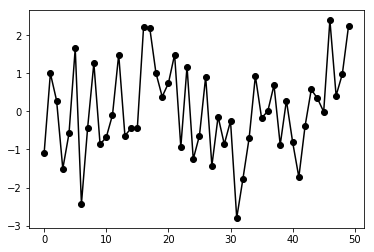

In [23]:
sample_size = 50
E = np.random.standard_normal(size = sample_size)
plt.plot(E, '-ok')

In [24]:
np.mean(E)

0.013271441083785014

### Simulate X values

In [25]:
X = np.random.ranf(sample_size)*2
X

array([0.68552767, 0.60824158, 0.83404442, 1.36260153, 1.75091368,
       1.02084467, 1.33862757, 1.17187311, 1.249807  , 1.3493781 ,
       1.68468488, 0.16638998, 1.52736568, 0.48733275, 0.38844592,
       1.14491391, 0.19142503, 1.77065365, 1.25449794, 1.44683272,
       0.03225841, 1.18886376, 1.11357038, 0.31791929, 0.30614103,
       1.39105906, 0.63753285, 1.38394059, 1.1087665 , 0.77790115,
       1.85026498, 1.68333999, 0.71479513, 0.08718293, 0.60953615,
       0.79637136, 1.40991766, 1.99071696, 0.71182973, 1.52509563,
       1.18635383, 1.3834036 , 0.3022549 , 0.79775259, 0.4817118 ,
       0.68691203, 1.02625631, 1.3332491 , 0.21181697, 0.2617899 ])

### Generate Y values and plot the population regression line

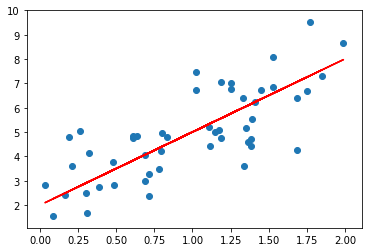

In [26]:
a = 2
b = 3 
Y = a + b*X + E #this is our model
plt.plot(X, (a + b*X), '-r')
plt.scatter(X, Y)

## Build a least squares line using the above dataset

In [27]:
regr = linear_model.LinearRegression()
X_org = X.copy()
X = X.reshape(-1, 1)
regr.fit(X, Y)
y_hat = regr.predict(X)
residuals = Y - y_hat

In [28]:
b_hat = regr.coef_[0]
a_hat = regr.intercept_
print(a_hat, b_hat)

2.3997504649770485 2.6035535705559765


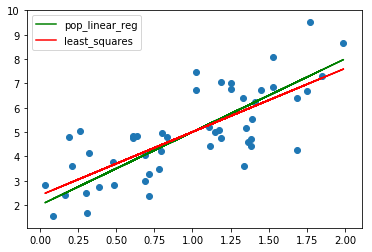

In [29]:
plt.plot(X_org, (a + b*X_org), '-g',label ='pop_linear_reg')
plt.scatter(X_org, Y)
plt.plot(X_org, (a_hat + b_hat*X_org), '-r', label = 'least_squares')
plt.legend(loc='upper left')

-3.552713678800501e-16


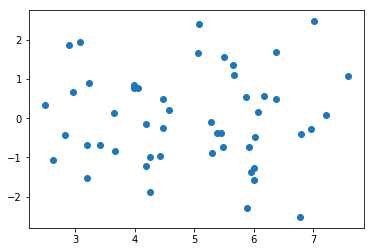

In [30]:
plt.scatter(y_hat, residuals)
print(np.mean(residuals))

In [31]:
#both represent the same
#rss_model = np.sum(np.square(Y - y_hat))
rss_model = np.sum(np.square(Y - (a_hat + b_hat*X_org)))

### Learning points
1. Even though we are using the data generated by the population regression line, our least squares line is not the same as the population regression line
    - Population regression line is Y = 2 + 3*X
    - Least Squares line is Y = 2.139 +2.89*X


2. This is because we are using only one sample of data to estimate the coefficients.
3. If we use multiple samples from the model(section 1.3) and generate the coefficients and take the mean of those coefficients then our coefficient estimates would be very very close to the population parameters
4. This process is analogus to the concept of estimating the population mean from sample mean based on the concept of bias.
5. What is the concept of bias? 
    
    Using one sample parameter like mean to estimate the population parameter is an unbiased estimate. **On an average** this estimate is equal to the population parameter. This means that on the basis of just one estimate we either over or underestimate the population parameter but, if we take multiple samples and calculate multiple sample parameter and then take an average of them, the resulting estimate would be very very close to the population parameter, which in our case are the a_hat and b_hat values. 
Let us see this in an example from section 5



## Plotting RSS- Residual Sum of Squares

Now for different values of a_hat and b_hat let us visualize the RSS distribution and see if our linear regression model we built above actually calculated a_hat and b_hat which would minimize the RSS

For this we have calculated RSS for multiple values of a_hat and b_hat and plotted the RSS using the same data we generated in section 1 above.

Model Parameters 2.3997504649770485 2.6035535705559765
Parameter having min RSS using simulated data 2.36572 2.60626
RSS from the simulation and the model are: 68.69242277478885 and 68.64305097545831


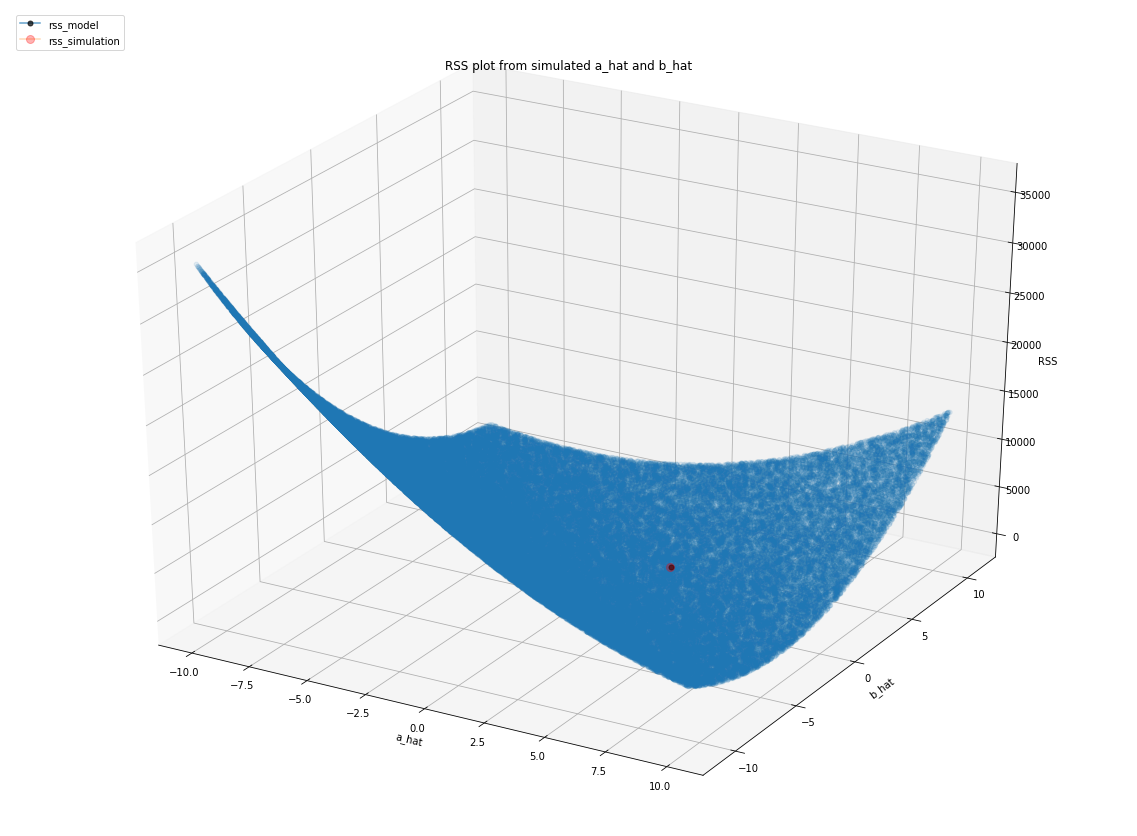

In [32]:
rss_master = []
samples = 100000
a_hat_space = np.round(np.linspace(-10,10,samples),5)
b_hat_space = np.round(np.linspace(-11,11,samples),5)
np.random.shuffle(a_hat_space)
np.random.shuffle(b_hat_space)
coeffs = zip(a_hat_space, b_hat_space)
rss_min = 0.0
a_hat_min = np.nan
b_hat_min = np.nan
for _a, _b in coeffs:
    rss = np.sum(np.square(Y - (_a + _b*X_org)))
    if rss_min == 0.0:
        a_hat_min = _a
        b_hat_min = _b
        rss_min = rss
    elif rss < rss_min:
        a_hat_min = _a
        b_hat_min = _b
        rss_min = rss
    rss_master = np.append(rss_master, rss)

#plotting code
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111, projection='3d')

Axes3D.scatter(ax, xs = a_hat_space, ys = b_hat_space, zs = rss_master, alpha =0.1)
ax.plot([a_hat], [b_hat], [rss_model], markerfacecolor='k', markeredgecolor='k', marker='o',\
        markersize=5, alpha=0.7, label="rss_model")
ax.plot([a_hat_min], [b_hat_min], [rss_min], markerfacecolor='r', markeredgecolor='r', marker='o',\
        markersize=8, alpha=0.3, label = 'rss_simulation')
print("Model Parameters", a_hat, b_hat)
print("Parameter having min RSS using simulated data", a_hat_min, b_hat_min)
ax.set_title("RSS plot from simulated a_hat and b_hat")
ax.set_xlabel("a_hat")
ax.set_ylabel("b_hat")
ax.set_zlabel("RSS")
plt.legend(loc='upper left')
print("RSS from the simulation and the model are: {} and {}".format(rss_min, rss_model))

### Learning point
1. The Least Squares model generated a_hat and b_hat such that it minimizes RSS, we can clearly see how these values represent the min RSS when we compare the red dot vs black dot in the graph. They over lap each other.
2. If we try the same simulation with a different seed then we make not be able to generate the aspired a_hat and b_hat in the simulation, try changing the seed and see what happens


## Building Least Squares Line using multiple samples

Sample  0 2.3296876240462727 2.753177963214021
Sample  1 2.007313451214587 3.1533985891374865
Sample  2 2.4643086712386997 2.6039714120595945
Sample  3 1.643771216083072 3.4579664818346063
Sample  4 1.8172990461172525 3.1769012880180876
Sample  5 2.299675610969613 2.787319626844873
Sample  6 1.5112737621045795 3.225757479906975
Sample  7 1.5942352485664881 3.216807837850062
Sample  8 1.8245950757900227 3.2545241833319625
Sample  9 1.7996970785108033 3.271882676334177
Sample  10 1.6649921406243187 3.270987110690478
Sample  11 1.6905327321234038 3.1774555668753157
Sample  12 1.9754576804500519 2.9635501685211305
Sample  13 1.783401988248229 3.22451367664411
Sample  14 2.243489171461208 2.991721937300325
Sample  15 2.698090891294582 2.383133360064521
Sample  16 1.7417634426731365 3.2298711054253397
Sample  17 2.2842922225942006 3.053316836257935
Sample  18 1.714726280209204 3.2260779726510154
Sample  19 2.324139686398111 3.0854953670455854
a_hat and b_hat estimates using multiple samples 

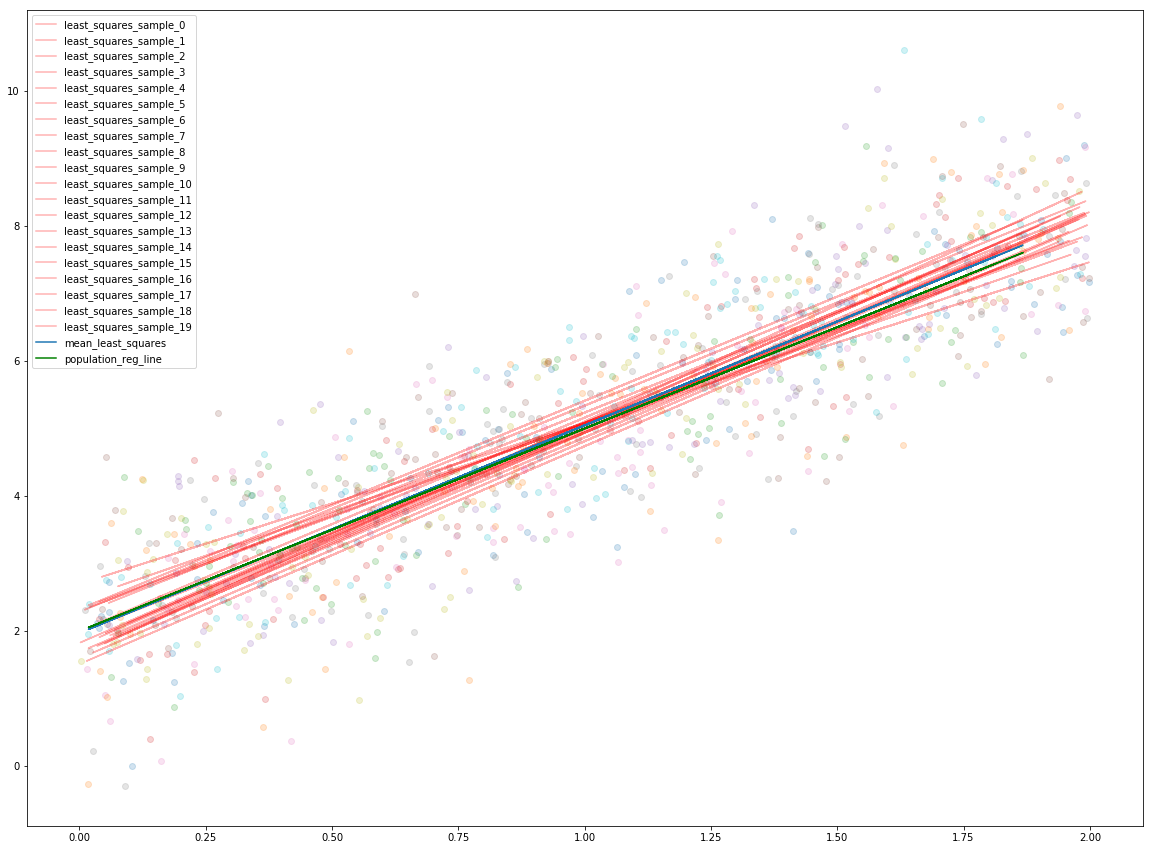

In [33]:
number_of_samples = 20
sample_size = 50
a_list = []
b_list = []
plt.figure(figsize=(20,15))

for sample in range(number_of_samples):
    #Simulate random error
    E = np.random.standard_normal(size = sample_size)
    #Simulate X data
    X = np.random.ranf(sample_size)*2
    #Calculate Y using X and E
    Y = a + b*X + E
    #build least squares line
    regr = linear_model.LinearRegression()
    X = X.reshape(-1, 1)
    regr.fit(X, Y)
    b_hat = regr.coef_[0]
    a_hat = regr.intercept_
    #storing regression results
    print("Sample_",sample, a_hat, b_hat)
    a_list.append(a_hat)
    b_list.append(b_hat)
    #plotting code
    plt.scatter(X, Y, alpha=0.2)
    plt.plot(X, (a_hat + b_hat*X), '-r', label = 'least_squares_sample_'+str(sample), alpha=0.3)

a_hat_mean = np.mean(a_list)
b_hat_mean = np.mean(b_list)
print("a_hat and b_hat estimates using multiple samples ",a_hat_mean, b_hat_mean)
plt.plot(X, (a_hat_mean + b_hat_mean*X), label = 'mean_least_squares')
plt.plot(X, (a + b*X), '-g',label ='population_reg_line')
plt.legend(loc='upper left')